In [2]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans

In [3]:
TelecomChurn = pd.read_csv("/content/Customer-Churn .csv")
#first few rows
TelecomChurn.head()
# print(TelecomChurn.shape)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# data summary
print("Data dimension:",TelecomChurn.shape)
TelecomChurn.info()

Data dimension: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBillin

In [5]:
# encoding the churn variable into 0 and 1
TelecomChurn['Churn'] = TelecomChurn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
TelecomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
# changing TotalCharges column from object to float
TelecomChurn['TotalCharges'] = TelecomChurn['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')
# print(TelecomChurn.dtypes)

In [9]:
# check for null and total observations related to it
null_columns=TelecomChurn.columns[TelecomChurn.isnull().any()]
TelecomChurn[null_columns].isnull().sum()

TotalCharges    11
dtype: int64

In [10]:
meanTotalCharge = TelecomChurn.TotalCharges.mean()
TelecomChurn['TotalCharges']=TelecomChurn['TotalCharges'].fillna(meanTotalCharge)

In [11]:
# summary description of the numeric variables of the dataset
TelecomChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000259
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


In [12]:
# to check the number of unique values in each of the columns
for col in list(TelecomChurn.columns):
    print(col, TelecomChurn[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [13]:
# calculate the proportion of churn vs non-churn
TelecomChurn['Churn'].mean() 

0.2653698707936959

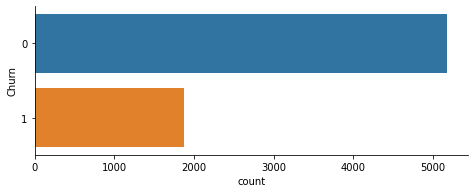

In [14]:
ax = sns.catplot(y="Churn", kind="count", data=TelecomChurn, height=2.6, aspect=2.5, orient='h')

Text(0.5, 1.0, 'Churn Distribution by gender')

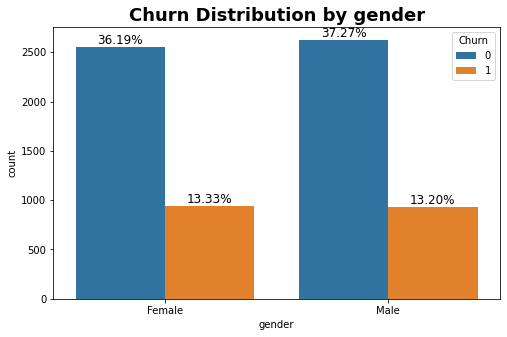

In [15]:
plt.figure(figsize=(8,5))
p=sns.countplot(x="gender", hue="Churn", data=TelecomChurn)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/TelecomChurn.shape[0])),fontsize=12,ha='center',va='bottom')
sns.set(font_scale=1.5)
plt.title('Churn Distribution by gender', fontweight="bold")

Churn by contract: Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


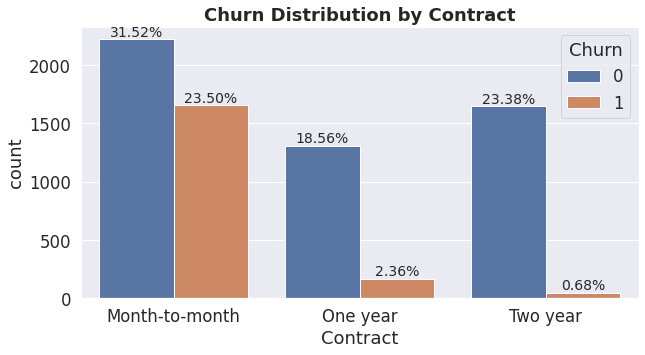

In [16]:
# calculate the proportion of churn by contract
plt.figure(figsize=(10,5))
p=sns.countplot(x='Contract',hue='Churn',data=TelecomChurn)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+2,'{:.2f}%'.format(100*(height/TelecomChurn.shape[0])),fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
plt.title('Churn Distribution by Contract', fontweight='bold')

churn_by_contract = TelecomChurn.groupby(by='Contract')['Churn'].sum() / TelecomChurn.groupby(by='Contract')['Churn'].count() * 100.0
print('Churn by contract:',churn_by_contract)

Churn by payment method: PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


,Churn
PaymentMethod,
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101
Electronic check,45.285412
Mailed check,19.106700


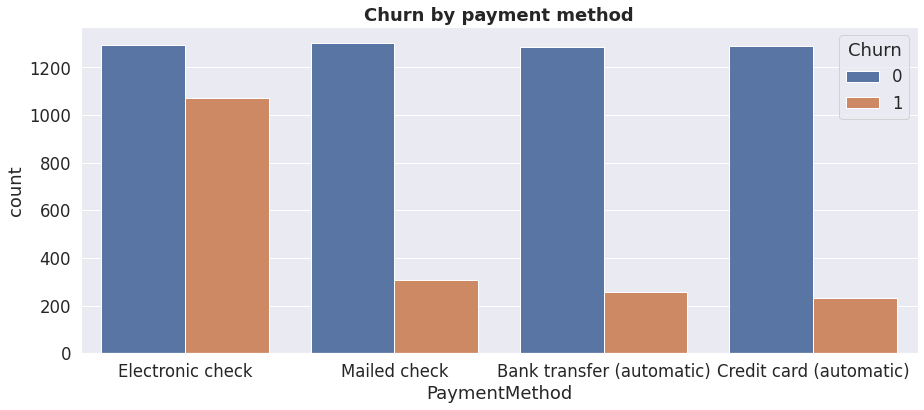

In [17]:
# calculate the proportion of churn by payment method
plt.figure(figsize=(15,6))
p=sns.countplot(x='PaymentMethod',hue='Churn', data=TelecomChurn)

plt.title ('Churn by payment method', fontweight='bold')

churn_by_payment = TelecomChurn.groupby(by='PaymentMethod')['Churn'].sum() / TelecomChurn.groupby(by='PaymentMethod')['Churn'].count() * 100.0
print('Churn by payment method:',churn_by_payment)
pd.DataFrame(churn_by_payment)

In [18]:
df = TelecomChurn.groupby(by='PaymentMethod')['Churn'].sum()
df.head()

PaymentMethod
Bank transfer (automatic)     258
Credit card (automatic)       232
Electronic check             1071
Mailed check                  308
Name: Churn, dtype: int64

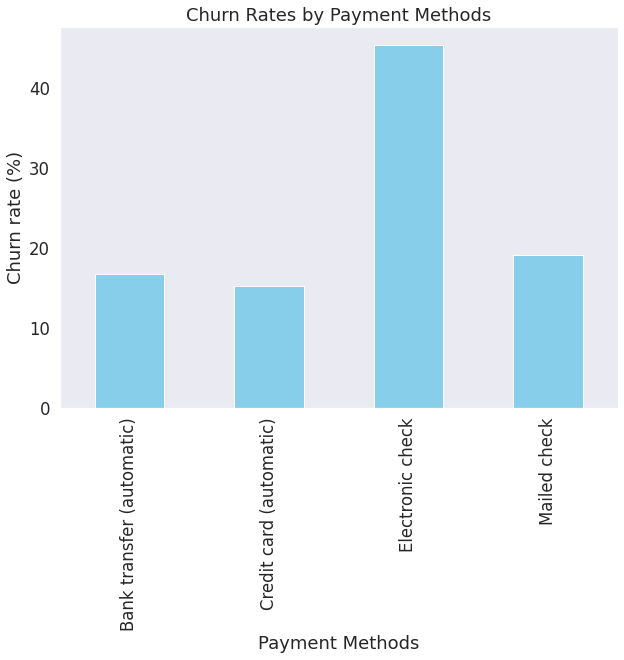

In [19]:
# figure
ax = churn_by_payment.plot(
    kind='bar',
    color='skyblue',
    grid=False,
    figsize=(10, 7),
    title='Churn Rates by Payment Methods'
)

ax.set_xlabel('Payment Methods')
ax.set_ylabel('Churn rate (%)')

plt.show()

In [21]:
# proportion of churn by gender and contract
churn_gendercontract = TelecomChurn.groupby(['gender', 'Contract'])['Churn'].sum()/TelecomChurn.groupby(['gender', 'Contract'])['Churn'].count()*100
churn_gendercontract

gender  Contract      
Female  Month-to-month    43.740260
        One year          10.445682
        Two year           2.603550
Male    Month-to-month    41.692308
        One year          12.052980
        Two year           3.058824
Name: Churn, dtype: float64

In [22]:
# keep gender in row and contract by column
churn_gendercontract1 = churn_gendercontract.unstack('Contract').fillna(0)
churn_gendercontract1 

Contract,Month-to-month,One year,Two year
gender,,,
Female,43.740260,10.445682,2.603550
Male,41.692308,12.052980,3.058824


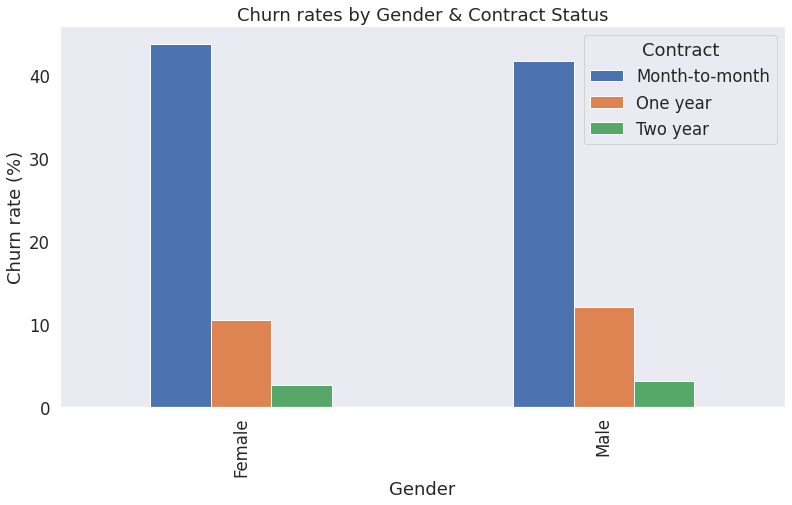

In [23]:
# figure
ax = churn_gendercontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(13,7)
)

ax.set_title('Churn rates by Gender & Contract Status')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn rate (%)')

plt.show()

In [24]:
# observations by citizen type
TelecomChurn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [25]:
# Total observations by citizen type, contract and tech support 
TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     1982
                               No internet service     512
                               Yes                     574
               One year        No                      458
                               No internet service     348
                               Yes                     477
               Two year        No                      203
                               No internet service     614
                               Yes                     733
1              Month-to-month  No                      698
                               No internet service      12
                               Yes                      97
               One year        No                       99
                               No internet service      16
                               Yes                      75
               Two year        No                       33
     

In [26]:
# proportion of churn by gender and contract
churn_citizentechcontract = TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].sum()/TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()*100
churn_citizentechcontract

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     47.780020
                               No internet service    18.359375
                               Yes                    30.139373
               One year        No                     14.628821
                               No internet service     2.586207
                               Yes                    12.788260
               Two year        No                      5.911330
                               No internet service     0.814332
                               Yes                     3.410641
1              Month-to-month  No                     57.736390
                               No internet service    41.666667
                               Yes                    34.020619
               One year        No                     15.151515
                               No internet service     0.000000
                               Yes                   

In [27]:
# keep gender and payment method in row and contract by column
churn_citizentechcontract1 = churn_citizentechcontract.unstack(['TechSupport']).fillna(0)
churn_citizentechcontract1

TechSupport                          No  No internet service        Yes
SeniorCitizen Contract                                                 
0             Month-to-month  47.780020            18.359375  30.139373
              One year        14.628821             2.586207  12.788260
              Two year         5.911330             0.814332   3.410641
1             Month-to-month  57.736390            41.666667  34.020619
              One year        15.151515             0.000000  18.666667
              Two year         6.060606             0.000000   4.545455

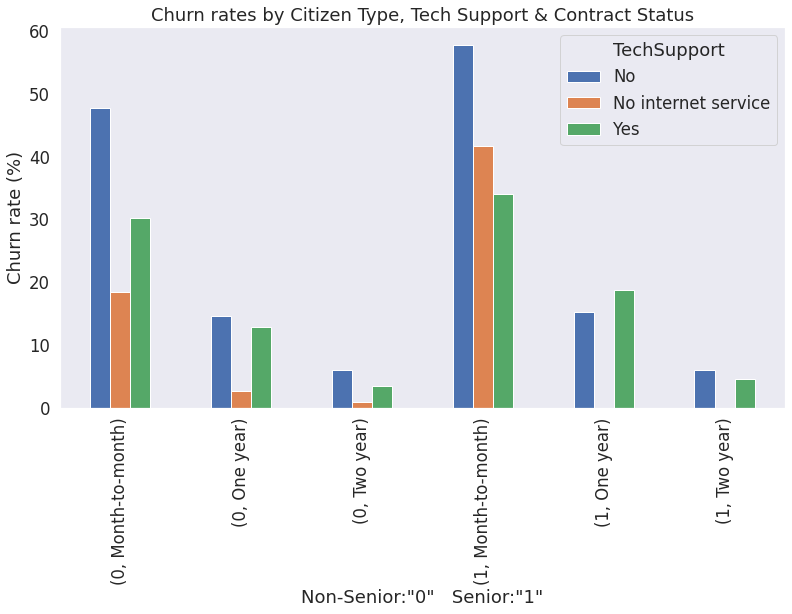

In [28]:
# figure
ax = churn_citizentechcontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(13,7)
)

ax.set_title('Churn rates by Citizen Type, Tech Support & Contract Status')
ax.set_xlabel('Non-Senior:"0"   Senior:"1"')
ax.set_ylabel('Churn rate (%)')

plt.xticks()
plt.show()

In [29]:
# summary of tenure, monthly charges and total charges
TelecomChurn[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000259
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


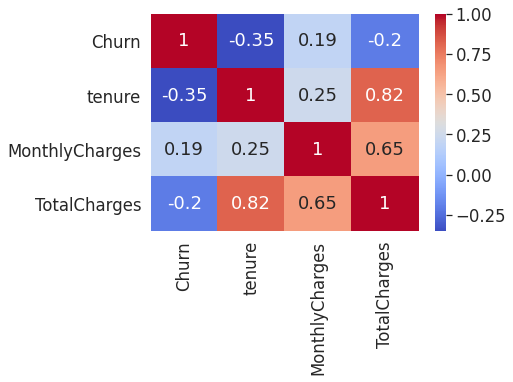

In [30]:
# finding correlations
corrdata = TelecomChurn[['Churn','tenure','MonthlyCharges','TotalCharges']]
corr = corrdata.corr()
# plot the heatmap
sns.heatmap(corr,cmap="coolwarm",
        xticklabels=corrdata.columns,
        yticklabels=corrdata.columns,annot=True)

In [31]:
# segmenting based on data type and pre-processing
#customer id col
Id_col     = ['customerID']
#Target column. y should be an array
target_col = ["Churn"]
y = (TelecomChurn[target_col]).values.ravel()
# cluster column 
cluster_col = ["tenure"]
#categorical columns with categories less than 6
cat_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
print("categorical ")
print(cat_cols)
#Binary columns with 2 values
bin_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() == 2].keys().tolist()
print('binary')
print(bin_cols)
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

print(multi_cols)
# continuous column
cont_col = ["tenure","MonthlyCharges"]
print(cont_col)
print(y)

categorical 
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
binary
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
['tenure', 'MonthlyCharges']
[0 0 1 ... 0 1 0]


In [32]:
#Label encoding Binary columns
le = LabelEncoder()
binary = TelecomChurn[bin_cols]
print(binary.shape) 
print(binary.info())
binary.head()
for i in bin_cols :
    binary[i] = le.fit_transform(binary[i])
print(binary.head())

(7043, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   object
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   object
 3   Dependents        7043 non-null   object
 4   PhoneService      7043 non-null   object
 5   PaperlessBilling  7043 non-null   object
 6   Churn             7043 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 385.3+ KB
None
   gender  SeniorCitizen  Partner  ...  PhoneService  PaperlessBilling  Churn
0       0              0        1  ...             0                 1      0
1       1              0        0  ...             1                 0      0
2       1              0        0  ...             1                 1      1
3       1              0        0  ...             0                 0      0
4       0              

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
# multi-label categorical columns
dummy_vars = pd.get_dummies(TelecomChurn[multi_cols])
print(dummy_vars.shape)
print(dummy_vars.info())

(7043, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype
---  ------                                   --------------  -----
 0   MultipleLines_No                         7043 non-null   uint8
 1   MultipleLines_No phone service           7043 non-null   uint8
 2   MultipleLines_Yes                        7043 non-null   uint8
 3   InternetService_DSL                      7043 non-null   uint8
 4   InternetService_Fiber optic              7043 non-null   uint8
 5   InternetService_No                       7043 non-null   uint8
 6   OnlineSecurity_No                        7043 non-null   uint8
 7   OnlineSecurity_No internet service       7043 non-null   uint8
 8   OnlineSecurity_Yes                       7043 non-null   uint8
 9   OnlineBackup_No                          7043 non-null   uint8
 10  OnlineBackup_No internet service         7043 non-null   uint

In [34]:
dummy_vars.head()

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0


In [35]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(TelecomChurn[cont_col])
scaled = pd.DataFrame(TelecomChurn,columns= cont_col)
scaled.shape
print(scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   MonthlyCharges  7043 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 110.2 KB
None


In [36]:
# creating a dataset to combine pre-processed variables
X = pd.concat([binary,scaled,dummy_vars], axis = 1)
# drop churn variable from the X dataset
X = X.drop(['Churn'],axis=1)
print(X.shape)
print(X.info())

(7043, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   PaperlessBilling                         7043 non-null   int64  
 6   tenure                                   7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   MultipleLines_No                         7043 non-null   uint8  
 9   MultipleLines_No phone service           7043 non-null   uint8  
 10  MultipleLines_Yes                    

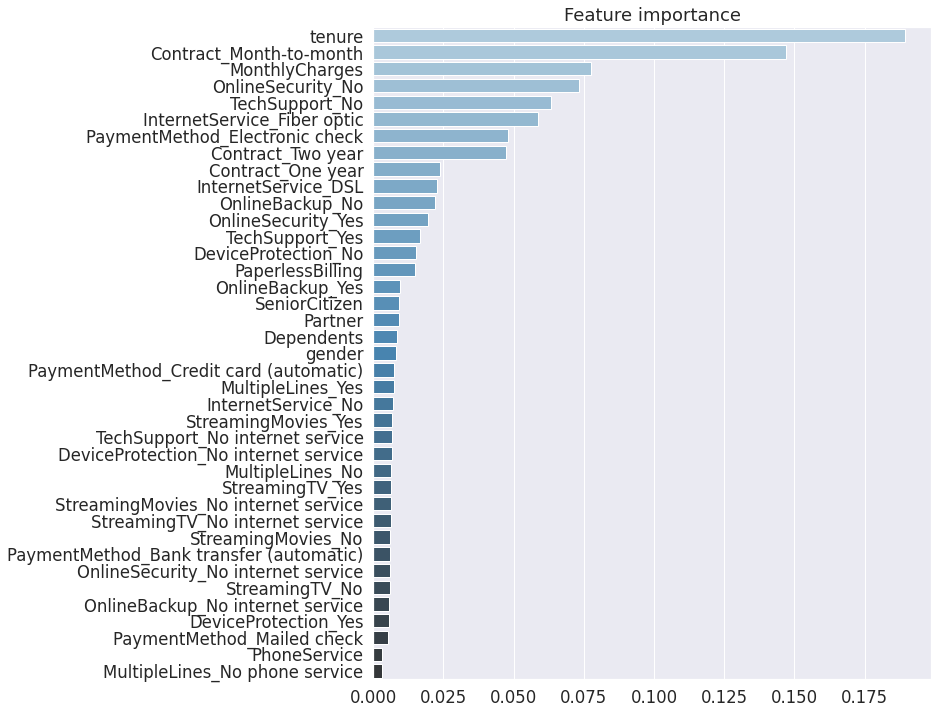

In [37]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
from sklearn.ensemble import RandomForestClassifier


df = pd.get_dummies(X)

x, y = df, y
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [38]:
# import machine learning libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


# creating the function
# SVC functions are used while modeling and are thus not presented here
logreg = LogisticRegression(solver='lbfgs', max_iter = 10000)
DT = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [40]:
# recursive feature extraction for the top 15 features
rfe = RFE(rfc, 10)
rfe = rfe.fit(X, y)

print(rfe.support_)
print(rfe.ranking_)

#identifying columns for RFE
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })

# extract columns as a list
rfe_var = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data

[ True False False False False  True  True  True False False False False
  True False  True False False  True False False False False False  True
 False False False False False False False False  True False False False
 False  True False]
[ 1  5  2  6 25  1  1  1  4 23 12 21  1 30  1 29 17  1 26 13  3 27 15  1
 24 19 14 22  8  7 28 16  1 20 10 11  9  1 18]


,rfe_support,columns,ranking
0,True,gender,1
1,False,SeniorCitizen,5
2,False,Partner,2
3,False,Dependents,6
4,False,PhoneService,25
5,True,PaperlessBilling,1
6,True,tenure,1
7,True,MonthlyCharges,1
8,False,MultipleLines_No,4
9,False,MultipleLines_No phone service,23


In [41]:
X1 = X[rfe_var]

In [42]:
Xtrain, Xtest, ytrain,ytest = train_test_split(X1,y,test_size = 0.2,random_state = 212)

In [43]:
print('Ratio of churn in the training sample:',ytrain.mean())
print('Ratio of churn in the training sample:',ytest.mean())

Ratio of churn in the training sample: 0.26215832445864395
Ratio of churn in the training sample: 0.2782114975159688


In [44]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.799
Best parameters: {'C': 10}


In [45]:
def result(X_test,y_test):

    y_test_pred = grid.predict(X_test)
    print('Accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred)))
    print(                                                                                )

    confusionmat_data = pd.DataFrame({'y_Predicted': y_test_pred,'y_Actual': y_test},columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(confusionmat_data['y_Actual'], confusionmat_data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print('Confusion Matrix:\n {}\n'.format(confusion_matrix))
    print(                                                                               )

    class_report = classification_report(y_test, y_test_pred)
    print('Classification report:\n {}\n'.format(class_report))
    print(                                                                               )

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    print('Mean-squared error:\n {}\n'.format(rmse))

    # predict probabilities
    #probs = grid.predict_proba(X_test)
    #probs = grid.predict(X_test)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          924   93
1          186  206


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1017
           1       0.69      0.53      0.60       392

    accuracy                           0.80      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



Mean-squared error:
 0.44498626385287793



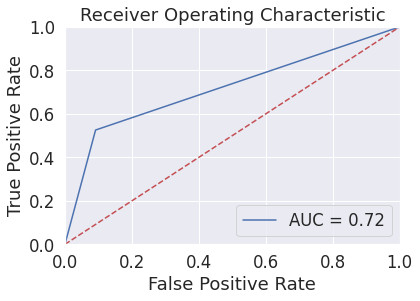

In [46]:
result(Xtest,ytest)

In [47]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,4,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.791
Best parameters: {'max_depth': 5, 'min_samples_split': 10}


0.5066816776974383 Contract_Month-to-month
0.21222134862158532 tenure
0.14877285752288866 InternetService_Fiber optic
0.04261596491050269 MonthlyCharges
0.03270118585442928 TechSupport_No


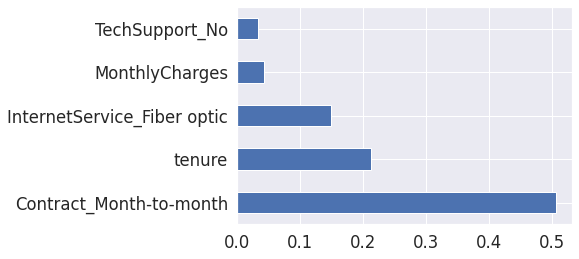

In [48]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')  

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          883  134
1          153  239


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1017
           1       0.64      0.61      0.62       392

    accuracy                           0.80      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.79      0.80      0.79      1409



Mean-squared error:
 0.45132090654138135



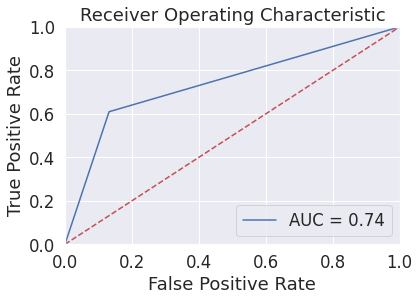

In [49]:
result(Xtest,ytest)

In [50]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.805
Best parameters: {'max_depth': 150, 'min_samples_split': 100, 'n_estimators': 10}


0.24031300326517863 tenure
0.20287688622041675 Contract_Month-to-month
0.177967391019154 OnlineSecurity_No
0.10864412572662818 TechSupport_No
0.10020878457298325 MonthlyCharges


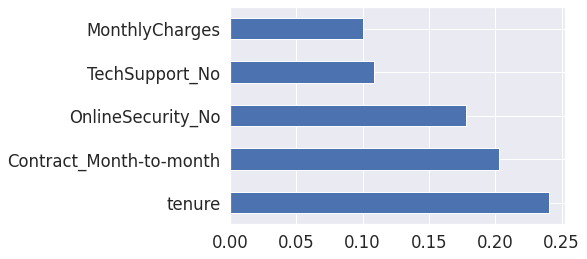

In [51]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          938   79
1          208  184


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1017
           1       0.70      0.47      0.56       392

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.71      1409
weighted avg       0.79      0.80      0.78      1409



Mean-squared error:
 0.45132090654138135



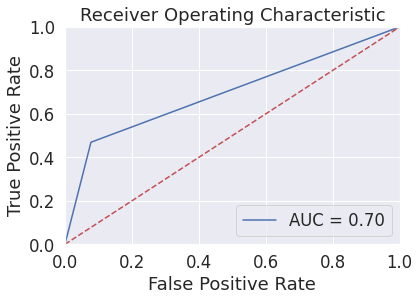

In [52]:
# result
result(Xtest,ytest)

In [57]:
import xgboost as xgb

In [58]:
#building the model & printing the score
parameter = {
'max_depth': [1,5,10,15],
'n_estimators': [50,100,150,300],
'learning_rate': [0.01, 0.1, 0.3],
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid = parameter, cv= 5, scoring='balanced_accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.715
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}


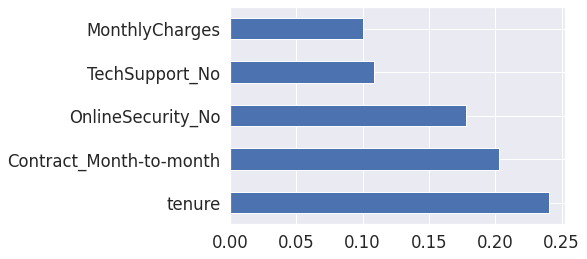

In [54]:
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh') 

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          938   79
1          208  184


Classification report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1017
           1       0.70      0.47      0.56       392

    accuracy                           0.80      1409
   macro avg       0.76      0.70      0.71      1409
weighted avg       0.79      0.80      0.78      1409



Mean-squared error:
 0.45132090654138135



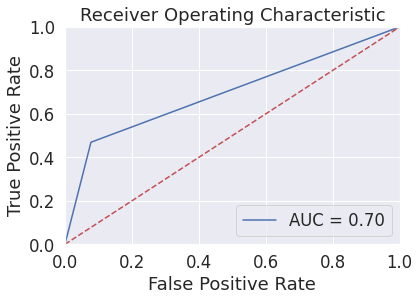

In [55]:
# result
result(Xtest,ytest)

In [56]:
parameter = {'C': [5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)

grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.803
Best parameters: {'C': 100}


Accuracy score:0.81

Confusion Matrix:
 Predicted    0    1
Actual             
0          936   81
1          189  203


Classification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1017
           1       0.71      0.52      0.60       392

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Mean-squared error:
 0.4377502326055384



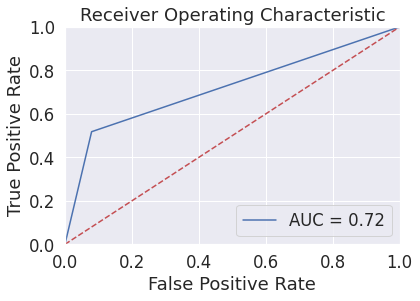

In [59]:
# result
result(Xtest,ytest)

In [60]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(X,y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns= X.columns)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns= ['Churn'])

print(os_smote_X.shape)
print(os_smote_Y.shape)

(7694, 39)
(7694, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [62]:
rfe = RFE(rfc, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

#identified columns Recursive Feature Elimination
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
selected_cols = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data
print(selected_cols)

[ True False False False False  True  True  True False False False False
  True False  True False False  True False False False False False  True
 False False False False False False False False  True False False False
 False  True False]
[ 1  5  2  6 22  1  1  1  3 25 12 21  1 27  1 26 19  1 23 15  4 29 13  1
 30 20  7 28 16  8 24 14  1 17 10 11  9  1 18]
['gender', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'TechSupport_No', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']


In [63]:
os_smote_Y.mean()

Churn    0.5
dtype: float64

In [64]:
#train and test data under SMOTE
train_smoterfe_X = os_smote_X[selected_cols]
train_smoterfe_Y = os_smote_Y.values.ravel()
test_smoterfe_X  = smote_test_X[selected_cols]
test_smoterfe_Y  = smote_test_Y

In [65]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.767
Best parameters: {'C': 0.1}


Accuracy score:0.74

Confusion Matrix:
 Predicted    0    1
Actual             
0          962  365
1           86  348


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1327
           1       0.49      0.80      0.61       434

    accuracy                           0.74      1761
   macro avg       0.70      0.76      0.71      1761
weighted avg       0.81      0.74      0.76      1761



Mean-squared error:
 0.5060676694745974



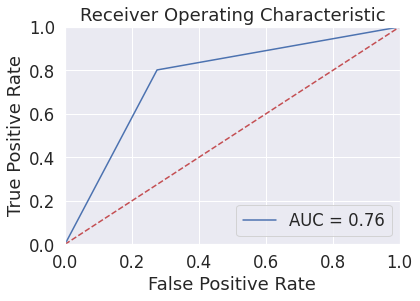

In [66]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

Best score: 0.826
Best parameters: {'max_depth': 150, 'min_samples_split': 100}
0.4954273140870852 Contract_Month-to-month
0.12524369881770708 OnlineSecurity_No
0.10055458694802027 PaymentMethod_Electronic check
0.09983001644194361 tenure
0.08162696683494061 MonthlyCharges


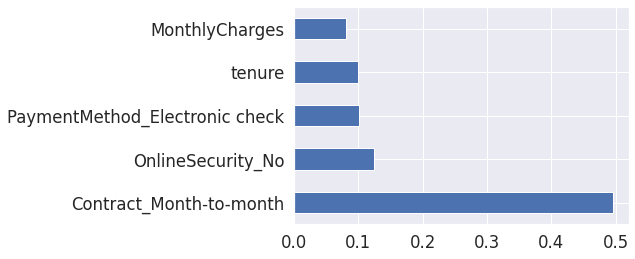

In [67]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_) 

grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh') 

Accuracy score:0.79

Confusion Matrix:
 Predicted     0    1
Actual              
0          1137  190
1           177  257


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86      1327
           1       0.57      0.59      0.58       434

    accuracy                           0.79      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.79      0.79      0.79      1761



Mean-squared error:
 0.456513215284836



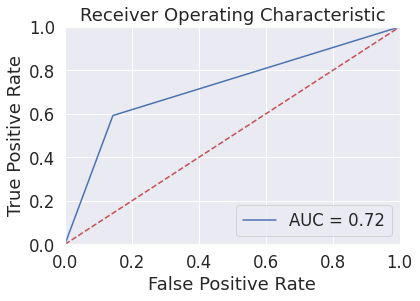

In [68]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

In [69]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.857
Best parameters: {'max_depth': 150, 'min_samples_split': 10, 'n_estimators': 100}


0.17955508272637036 tenure
0.17695200550357976 Contract_Month-to-month
0.15520969399313164 MonthlyCharges
0.11427535506226238 TechSupport_No
0.10742092352980372 OnlineSecurity_No


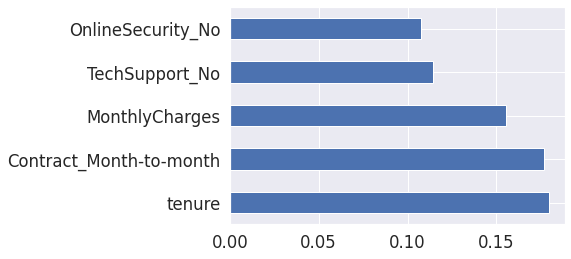

In [70]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh') 

Accuracy score:0.79

Confusion Matrix:
 Predicted     0    1
Actual              
0          1141  186
1           179  255


Classification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1327
           1       0.58      0.59      0.58       434

    accuracy                           0.79      1761
   macro avg       0.72      0.72      0.72      1761
weighted avg       0.79      0.79      0.79      1761



Mean-squared error:
 0.4552676107388355



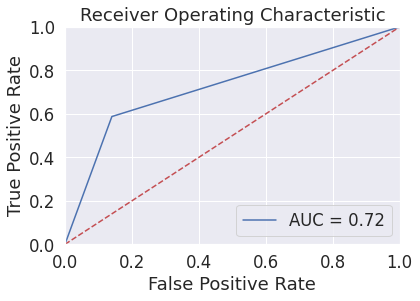

In [71]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

In [72]:
parameter = {'C': [1,5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.763
Best parameters: {'C': 100}


Accuracy score:0.75

Confusion Matrix:
 Predicted    0    1
Actual             
0          971  356
1           89  345


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81      1327
           1       0.49      0.79      0.61       434

    accuracy                           0.75      1761
   macro avg       0.70      0.76      0.71      1761
weighted avg       0.81      0.75      0.76      1761



Mean-squared error:
 0.5026900944537267



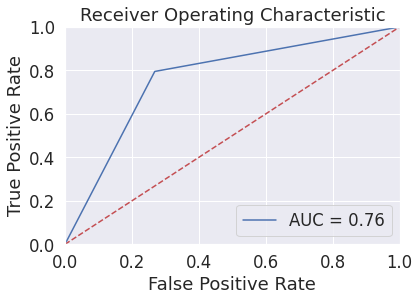

In [73]:
# result
result(test_smoterfe_X,test_smoterfe_Y)